In [1]:
import pandas as pd
from tensorflow import *
import numpy as np
import tensorflow as tf
from livelossplot import PlotLossesKeras


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

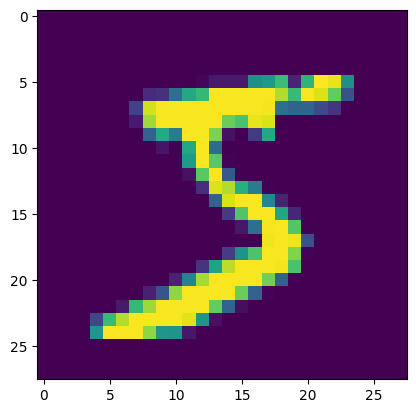

<Figure size 640x480 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt
first_array=x_train[0]

plt.imshow(first_array)
plt.show()



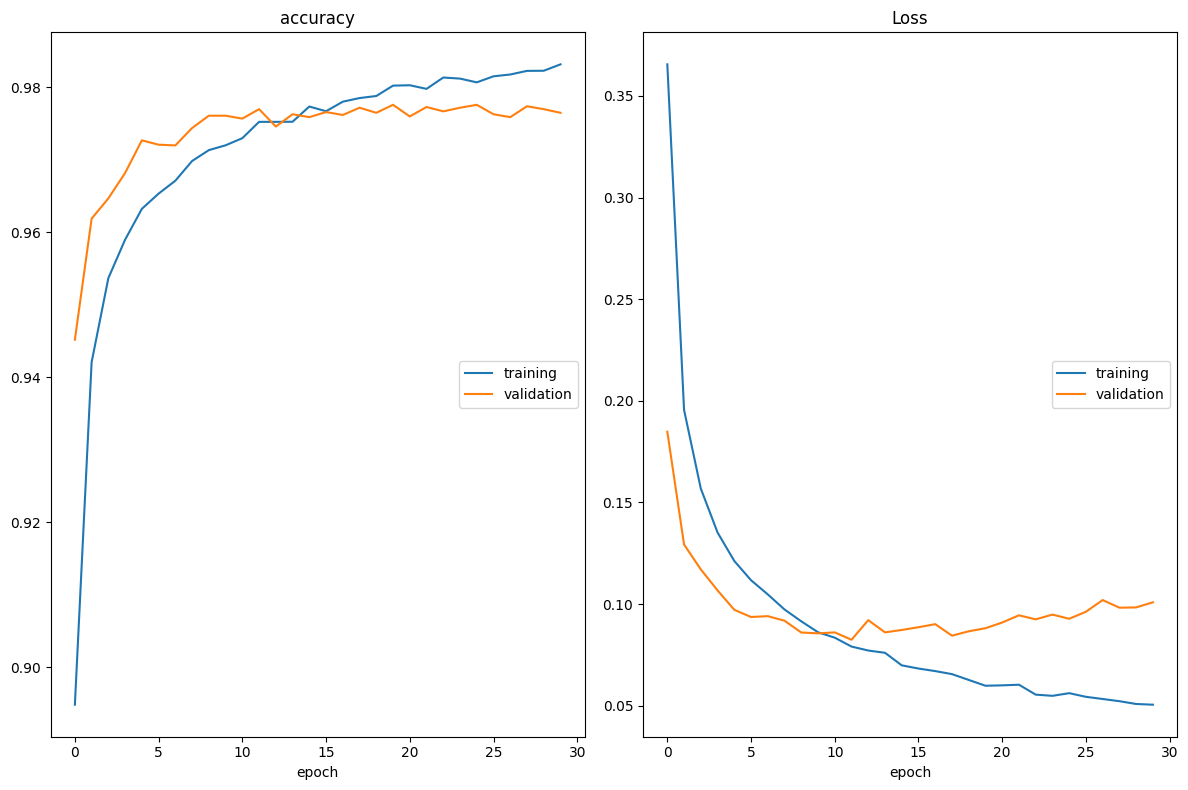

accuracy
	training         	 (min:    0.895, max:    0.983, cur:    0.983)
	validation       	 (min:    0.945, max:    0.978, cur:    0.976)
Loss
	training         	 (min:    0.051, max:    0.366, cur:    0.051)
	validation       	 (min:    0.082, max:    0.185, cur:    0.101)
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0505 - accuracy: 0.9832 - val_loss: 0.1009 - val_accuracy: 0.9765


In [4]:
plotlosses = PlotLossesKeras()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'],
              )

model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test),callbacks = [plotlosses])